<a href="https://colab.research.google.com/github/cnething/Project-3220/blob/main/Fundamentals_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Read in File

In [ ]:
library(tidyverse)
library(dplyr)
booksRaw <- read.csv("Goodreads_books_with_genres.csv")
#summary(books)
head(booksRaw)

,Book.Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Childrens;Adventure;Audiobook;Childrens,Middle Grade;Classics;Science Fiction Fantasy"
2,2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Childrens;Adventure;Audiobook;Childrens,Middle Grade;Classics;Science Fiction Fantasy"
3,4,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Childrens;Childrens,Middle Grade;Audiobook;Adventure;Classics;Science Fiction Fantasy"
4,5,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Childrens;Childrens,Middle Grade;Adventure;Audiobook;Classics;Science Fiction Fantasy"
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adventure;Fantasy,Supernatural;Mystery;Childrens;Fantasy,Paranormal;Childrens,Middle Grade"
6,9,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",W. Frederick Zimmerman,3.74,0976540606,9.780977e+12,en-US,152,19,1,4/26/2005,Nimble Books,Fiction


# Data Cleaning & EDA


,Book.Id,Title,Author,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genres
,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,1,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Childrens;Adventure;Audiobook;Childrens,Middle Grade;Classics;Science Fiction Fantasy"
2,2,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Childrens;Adventure;Audiobook;Childrens,Middle Grade;Classics;Science Fiction Fantasy"
3,4,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Childrens;Childrens,Middle Grade;Audiobook;Adventure;Classics;Science Fiction Fantasy"
4,5,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,"Fantasy;Fiction;Young Adult;Fantasy,Magic;Childrens;Childrens,Middle Grade;Adventure;Audiobook;Classics;Science Fiction Fantasy"
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,"Fantasy;Young Adult;Fiction;Fantasy,Magic;Adventure;Fantasy,Supernatural;Mystery;Childrens;Fantasy,Paranormal;Childrens,Middle Grade"
6,9,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",W. Frederick Zimmerman,3.74,0976540606,9.780977e+12,en-US,152,19,1,4/26/2005,Nimble Books,Fiction


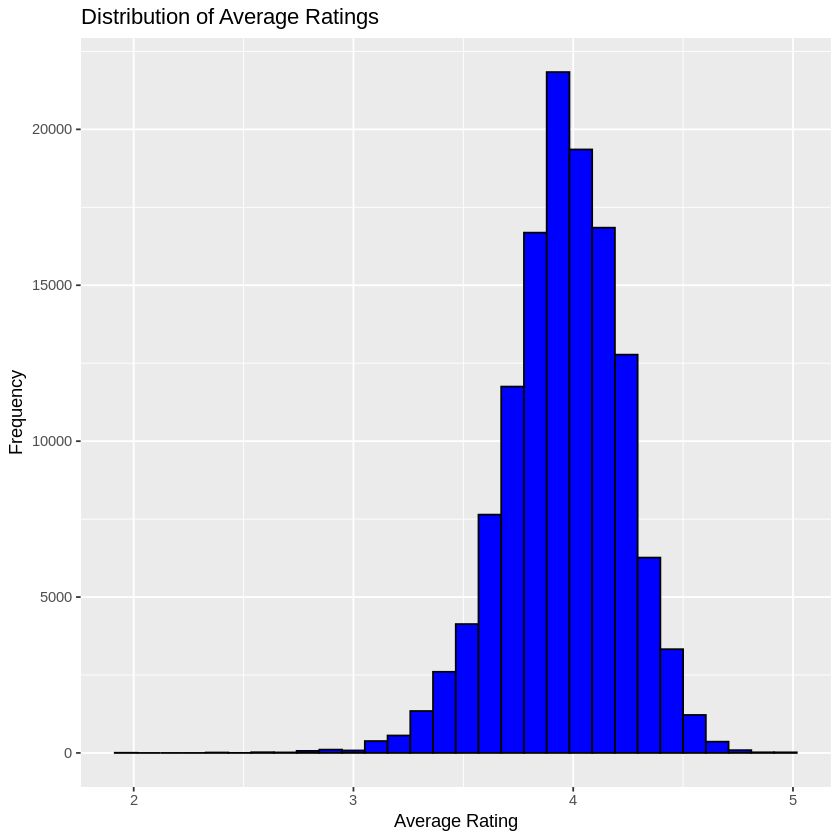

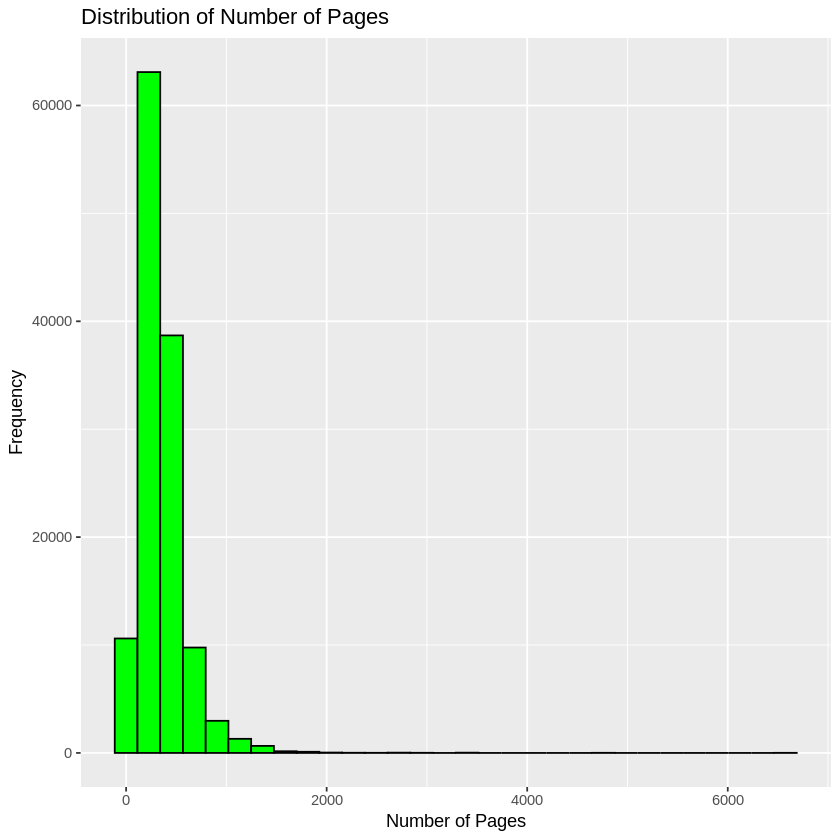

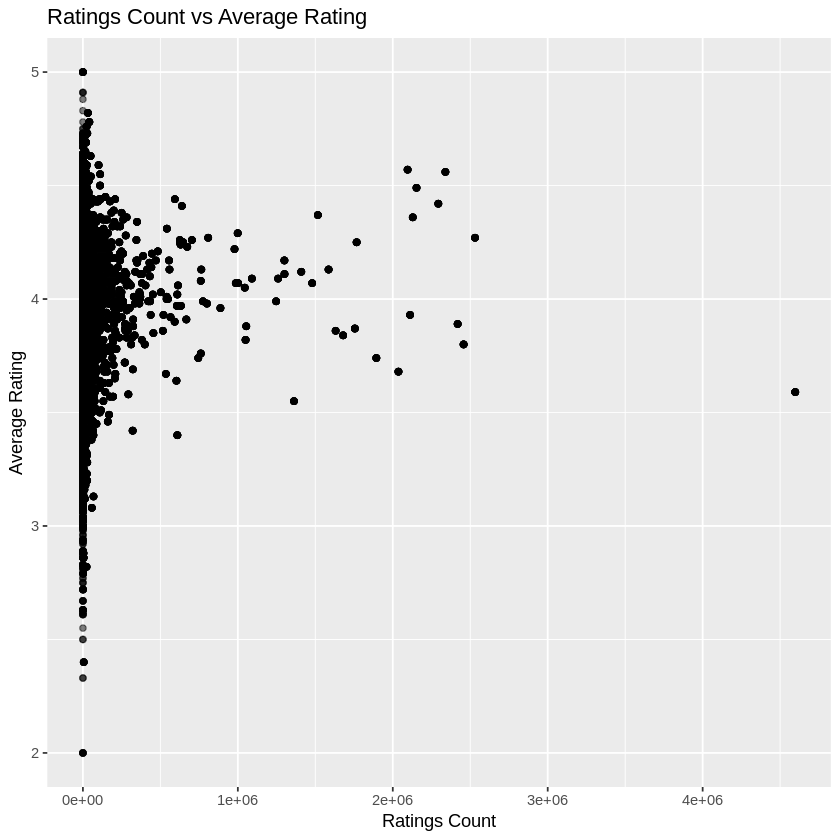

In [ ]:
# Load libraries
library(tidyverse)
library(dplyr)

# Load the dataset
booksRaw <- read.csv("Goodreads_books_with_genres.csv")

# Preview the raw data
head(booksRaw)

# Data Cleaning and Transformation
books <- booksRaw

# Separate genres into individual rows and remove any empty genre entries
books <- books %>%
  separate_rows(genres, sep = ';|,') %>%
  mutate(genres = trimws(genres)) %>%
  filter(genres != "")

# Create unique genre list
genreDF <- unique(books$genres)

# One-hot encoding for each genre
for (g in genreDF) {
  # Ensure column name is valid and doesn’t contain invalid characters
  col_name <- make.names(g)
  books[[col_name]] <- ifelse(grepl(g, books$genres), 1, 0)
}

# Drop the original genres column
books <- books %>% select(-genres)

# Standardize column names
names(books) <- tolower(gsub(" ", "_", names(books)))

# Remove duplicate column names
books <- books %>% select(unique(names(books)))

# Convert types
books <- books %>%
  mutate(
    num_pages = as.integer(num_pages),
    ratings_count = as.integer(ratings_count),
    text_reviews_count = as.integer(text_reviews_count),
    average_rating = as.numeric(average_rating),
    publication_date = as.Date(publication_date, format = "%m/%d/%Y")
  )

# Remove unwanted columns
books <- books %>% select(-isbn, -isbn13)

# Remove any books with no pages / no rating
books <- books %>% filter(num_pages > 0 & average_rating > 0)

# EDA: Visualize distributions of key numeric variables

# Histogram of average ratings
ggplot(books, aes(x = average_rating)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(title = "Distribution of Average Ratings", x = "Average Rating", y = "Frequency")

# Histogram of number of pages
ggplot(books, aes(x = num_pages)) +
  geom_histogram(bins = 30, fill = "green", color = "black") +
  labs(title = "Distribution of Number of Pages", x = "Number of Pages", y = "Frequency")

# Scatter plot of ratings count vs average rating
ggplot(books, aes(x = ratings_count, y = average_rating)) +
  geom_point(alpha = 0.5) +
  labs(title = "Ratings Count vs Average Rating", x = "Ratings Count", y = "Average Rating")



In [ ]:
# This next segment is to separate the genres into individual columns with 1 hot encoding
# Create a list of each genre
separate_genres <- books |> separate_rows(genres, sep=';|,')
genreDF <- separate_genres$genres |> unique() |> c()
# Creating a column for each genre and populating it with zeros
new_columns <- data.frame(matrix(0, nrow = nrow(books),
                                 ncol = length(genreDF)))
colnames(new_columns) <- genreDF
# Combining the two dataframes
books <- cbind(books, new_columns)
for (g in genreDF) {
  # Create a binary column for each genre
  books[[g]] <- sapply(books$genre, function(x) as.integer(grepl(g, x)))
}
# Drop original genre column
books$genres <- NULL

# Give column titles same naming convention
names(books) <- tolower(gsub(" ", "_", names(books)))

# Removes duplicate column names
books <- books[, !duplicated(names(books))]

# Convert types
books <- books |>
  mutate(
    num_pages = as.integer(num_pages),
    ratings_count = as.integer(ratings_count),
    text_reviews_count = as.integer(text_reviews_count),
    average_rating = as.numeric(average_rating),
    publication_date = as.Date(publication_date, format = "%m/%d/%Y")
  )

# Remove unwanted columns
books <- subset(books, select = -c(isbn,isbn13) )

#Remove any books with no pages / no rating
books <- filter(books, num_pages > 0 & average_rating > 0)


#EDA: Visualize distributions of key numeric variables
#Histogram of average ratings
ggplot(books, aes(x = average_rating)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  labs(title = "Distribution of Average Ratings", x = "Average Rating", y = "Frequency")


# Histogram of number of pages
ggplot(books, aes(x = num_pages)) +
  geom_histogram(bins = 30, fill = "green", color = "black") +
  labs(title = "Distribution of Number of Pages", x = "Number of Pages", y = "Frequency")

# Correlation between ratings count and average rating
ggplot(books, aes(x = ratings_count, y = average_rating)) +
  geom_point(alpha = 0.5) +



ERROR: Error: object 'books' not found
